In [1]:
# cargar las librerias necesarias

import pandas as pd # manejo y analisis de estructura de datos.
import numpy as np # calculos numericos y analissi de datos.
import matplotlib.pyplot as plt # creacion de graficos en dos dimenciones.
import seaborn as sns # creacion de graficos estadisticos.

# librerias para implementar modelos de datos

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
# Carga de datos

file_name = 'heart_cleveland_upload.csv'

df_heart_cleveland_csv = pd.read_csv(file_name,)

In [9]:
df_heart_cleveland_csv.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [11]:
# Información del dataset

df_heart_cleveland_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [13]:
 # nombre d elas columnas y cantidad

print(df_heart_cleveland_csv.shape)
print(df_heart_cleveland_csv.columns.values.tolist())

(297, 14)
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition']


In [17]:
# Validamos  valores faltantes
print(df_heart_cleveland_csv.isnull().sum())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


**age:** Edad del paciente.
**sex:** Sexo del paciente (usualmente 0 para femenino y 1 para masculino).
**cp:** Tipo de dolor en el pecho (0-3, donde diferentes números representan diferentes tipos de dolor).
**trestbps:** Presión arterial en reposo (en mm Hg).
**chol:** Nivel de colesterol en suero (en mg/dl).
**fbs:** Nivel de azúcar en sangre en ayunas (0 si es menor a 120 mg/dl, 1 si es mayor).
**restecg:** Resultados del electrocardiograma en reposo (valores que indican diferentes condiciones).
**thalach:** Frecuencia cardíaca máxima alcanzada.
**exang:** Angina inducida por ejercicio (0 si no, 1 si sí).
**oldpeak:** Depresión del segmento ST inducida por ejercicio, en relación con el reposo.
**slope:** Pendiente del segmento ST durante el ejercicio (valores que indican diferentes pendientes).
**ca:** Número de vasos sanguíneos principales (0-3) que están coloreados con fluoroscopía.
**thal:** Resultados de pruebas de thalassemia (valores que indican diferentes condiciones).
**condition:** Variable objetivo (0 o 1, donde 1 indica la presencia de enfermedad cardíaca).

In [27]:
# Datos estadistica descritiva

df_heart_cleveland = df_heart_cleveland_csv.copy()

print("Estadística Descritiva: ")
df_heart_cleveland.describe()

Estadística Descritiva: 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


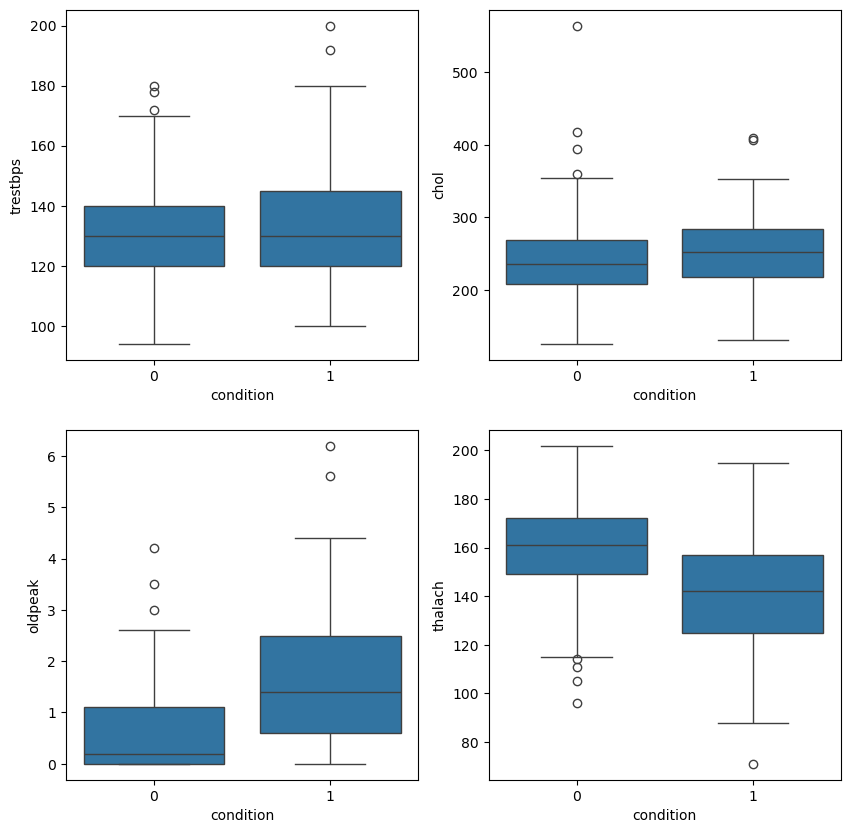

In [59]:
# identificacio de valores atipicos

plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
sns.boxplot(data=df_heart_cleveland, x='condition', y='trestbps')
plt.subplot(2, 2, 2)
sns.boxplot(data=df_heart_cleveland, x='condition', y='chol')
plt.subplot(2, 2, 3)
sns.boxplot(data=df_heart_cleveland, x='condition', y='oldpeak')
plt.subplot(2, 2, 4)
sns.boxplot(data=df_heart_cleveland, x='condition', y='thalach')
plt.show()

In [63]:
# Eliminamos valores faltantes

print("Cantidad de filas antes de eliminar valores nulos: ", len(df_heart_cleveland))
df_heart_cleveland = df_heart_cleveland.dropna()
print("Cantidad de filas después de eliminar valores nulos: ", len(df_heart_cleveland))

#  Revisamos si existe valores duplicados

print("Valores duplicados: ")
print(df_heart_cleveland.duplicated().sum())

# miramos si hay valores duplicados y los mostramos

df_heart_cleveland[df_heart_cleveland.duplicated()]
# df_heart_cleveland[df_heart_cleveland.duplicated].shape


Cantidad de filas antes de eliminar valores nulos:  297
Cantidad de filas después de eliminar valores nulos:  297
Valores duplicados: 
0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition


In [65]:
df_heart_cleveland.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [69]:
#  Mostramos los datos por columna

age = df_heart_cleveland['age'].unique()
print("Age: ", age)

sex = df_heart_cleveland['sex'].unique()
print("Sex: ", sex)

cp = df_heart_cleveland['cp'].unique()
print("Cp: ", cp)

trestbps = df_heart_cleveland['trestbps'].unique()
print("Trestbps: ", trestbps)

chol = df_heart_cleveland['chol'].unique()
print("Chol: ", chol)

fbs = df_heart_cleveland['fbs'].unique()
print("Fbs: ", fbs)

restecg = df_heart_cleveland['restecg'].unique()
print("Restecg: ", restecg)

thalach = df_heart_cleveland['thalach'].unique()
print("Thalach: ", thalach)

exang = df_heart_cleveland['exang'].unique()
print("Exang: ", exang)

oldpeak = df_heart_cleveland['oldpeak'].unique()
print("Oldpeak: ", oldpeak)

slope = df_heart_cleveland['slope'].unique()
print("Slope: ", slope)

ca = df_heart_cleveland['ca'].unique()
print("Ca: ", ca)

thal = df_heart_cleveland['thal'].unique()
print("Thal: ", thal)

condition = df_heart_cleveland['condition'].unique()
print("Condition: ", condition)

Age:  [69 66 65 64 63 61 60 59 58 56 52 51 45 42 40 38 34 74 71 70 62 57 55 54
 50 49 48 46 44 41 35 29 76 68 67 53 47 43 39 37 77]
Sex:  [1 0]
Cp:  [0 1 2 3]
Trestbps:  [160 140 150 138 110 170 145 134 178 120 118 152 125 148 156 128 136 130
 124 154 135 132 108 192 101 105 112 126 122 180 115 146 155 102 172 100
  94 129 142 144 106 117 158 174 164 114 165 200 123 104]
Chol:  [234 239 226 282 211 227 233 240 270 288 273 204 283 193 186 298 213 264
 244 199 231 182 269 302 245 246 195 281 208 221 284 319 236 261 232 294
 250 262 342 309 325 201 205 271 266 229 197 160 308 263 219 220 295 203
 198 235 306 157 192 210 265 254 274 277 564 212 278 417 360 335 313 252
 243 185 318 178 218 230 224 340 168 126 256 258 214 304 267 196 222 175
 188 149 275 255 257 253 177 141 242 315 209 180 268 321 215 174 322 286
 299 237 223 228 225 248 303 407 330 187 164 394 260 307 166 207 206 293
 305 326 249 176 216 259 300 276 289 241 131 354 184 409 217 353 327 200
 311 169 290 341 247 172 167 183]
F

In [71]:
#Validar niveles de presion arterial

nivel_min = df_heart_cleveland['trestbps'].min()
nivel_max = df_heart_cleveland['trestbps'].max()

print("Nivel mínimo de presión arterial: ", nivel_min)
print("Nivel máximo de presión arterial: ", nivel_max)

total_trestbps_atipicos = len(df_heart_cleveland[df_heart_cleveland['trestbps'] > 250])
print("Total de niveles atípicos de presión arterial: ", total_trestbps_atipicos)


Nivel mínimo de presión arterial:  94
Nivel máximo de presión arterial:  200
Total de niveles atípicos de presión arterial:  0


<Axes: >

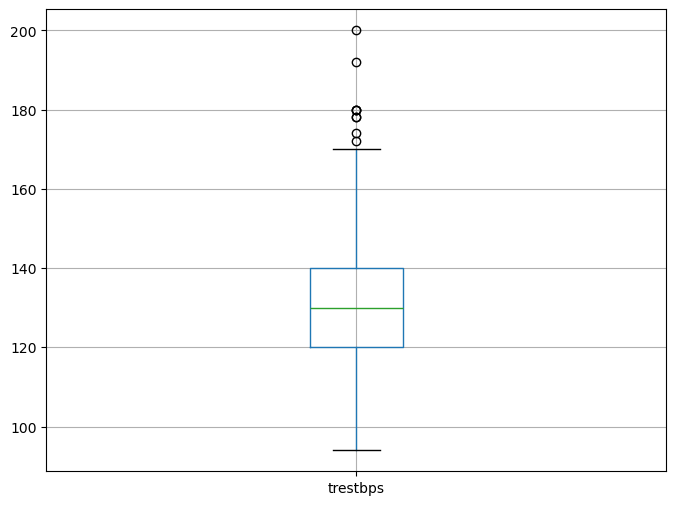

In [81]:
# Valores atípicos presion arterial en reposo

df_heart_cleveland.boxplot(column=['trestbps'], figsize=(8,6))


In [73]:
#  Mostramos las edades

age = df_heart_cleveland['age'].value_counts()
age.columns = ['age', 'count']
age

age
58    18
57    17
54    16
59    14
60    12
51    12
56    11
52    11
44    11
62    11
64    10
41    10
63     9
67     9
61     8
55     8
45     8
42     8
65     8
46     7
48     7
50     7
43     7
66     7
53     7
49     5
47     5
70     4
68     4
39     4
35     4
69     3
71     3
40     3
34     2
37     2
76     1
29     1
74     1
38     1
77     1
Name: count, dtype: int64

<Axes: >

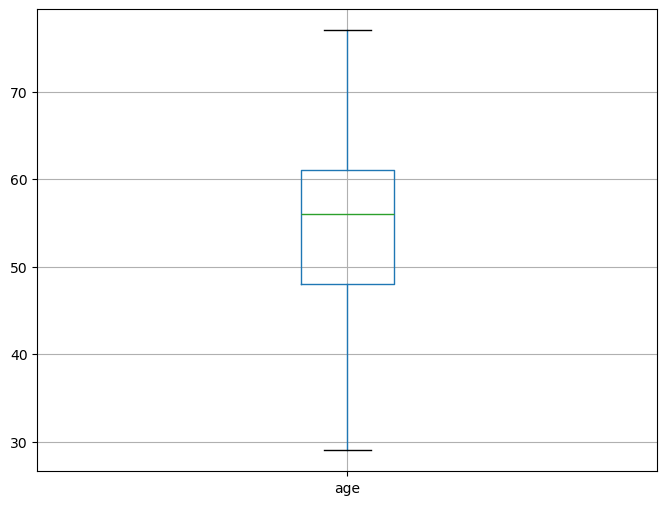

In [77]:
# Valores atípicos edad

df_heart_cleveland.boxplot(column=['age'], figsize=(8,6))

In [83]:
df_heart_cleveland['condition'].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

In [85]:
df_heart_cleveland[['condition']].head(20)

,condition
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,1
8,0
9,0


In [87]:
# Division de datos para entrenar el modelo.

X_data = df_heart_cleveland.drop("condition", axis=1)

y_data = df_heart_cleveland["condition"]

In [91]:
X_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0


In [93]:
y_data

0      0
1      0
2      0
3      1
4      0
      ..
292    1
293    1
294    1
295    0
296    1
Name: condition, Length: 297, dtype: int64

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [97]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((237, 13), (60, 13), (237,), (60,))

In [115]:
modelo_regresion = LogisticRegression(solver= "liblinear")
modelo_regresion.fit(X_train , y_train)

prediccion = modelo_regresion.predict(X_test)

In [117]:
print (prediccion)

[1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1
 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0]


In [103]:
print (X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
273   46    1   3       140   311    0        0      120      1      1.8   
259   51    0   3       130   305    0        0      142      1      1.2   
30    59    1   1       140   221    0        0      164      1      0.0   
22    34    1   0       118   182    0        2      174      0      0.0   
277   45    1   3       142   309    0        2      147      1      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
188   62    0   3       140   394    0        2      157      0      1.2   
71    29    1   1       130   204    0        2      202      0      0.0   
106   56    1   2       130   256    1        2      142      1      0.6   
270   47    1   3       110   275    0        2      118      1      1.0   
102   58    1   2       140   211    1        2      165      0      0.0   

     slope  ca  thal  
273      1   2     2  
259      1   0     2  
30       0   0    

In [105]:
print (y_train)

273    1
259    1
30     0
22     0
277    1
      ..
188    0
71     0
106    1
270    1
102    0
Name: condition, Length: 237, dtype: int64


In [107]:
print (y_test)

167    1
211    1
63     0
154    0
5      0
77     0
183    1
158    1
9      0
139    0
285    0
78     0
92     0
101    0
42     0
222    1
283    1
33     1
263    1
148    0
245    1
45     1
60     0
46     0
278    0
237    1
175    1
234    1
17     0
279    1
111    0
219    1
24     0
82     0
7      1
75     1
108    0
84     0
90     0
73     0
116    0
126    1
233    0
59     0
195    1
208    1
97     0
185    1
176    0
124    0
93     1
294    1
182    1
275    0
192    1
292    1
25     0
224    1
6      0
181    1
Name: condition, dtype: int64


In [119]:
# desempeño deñl modelo de regresion

print(classification_report(y_test,prediccion))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



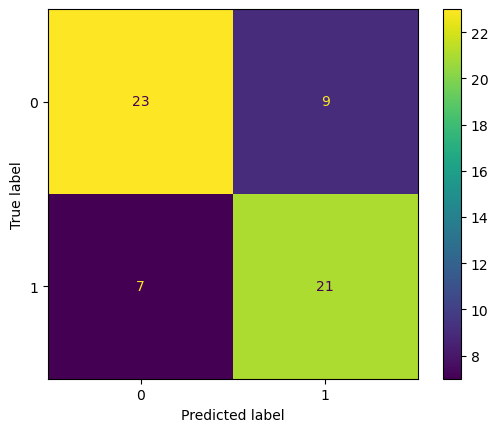

In [125]:
# matris de confucion el modelo

cm=confusion_matrix(y_test,prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

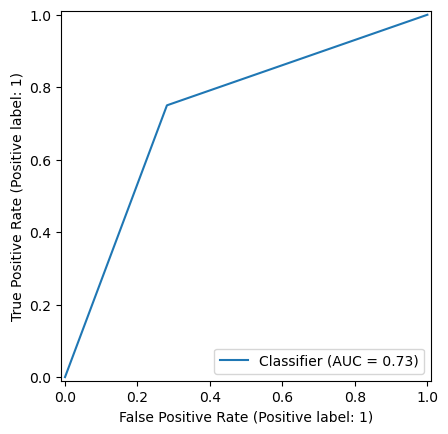

In [129]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, prediccion)
plt.show()


# Interpretación de Resultados del Modelo de Predicción de Enfermedades Cardíacas
Desempeño del Modelo
El desempeño de los modelos entrenados para predecir enfermedades cardíacas fue evaluado a través de varias métricas. La regresión logística, que se seleccionó por su simplicidad y eficacia en problemas de clasificación binaria, obtuvo una exactitud del 73%. Esta cifra sugiere que el modelo es razonablemente efectivo, aunque hay espacio para mejorar la detección de la clase de enfermos.

Métricas Clave:
Exactitud (Accuracy): 0.73
Precisión (Precision): 0.77 para clase 0 (no enfermo) y 0.70 para clase 1 (enfermo).
Recall: 0.72 para clase 0 y 0.75 para clase 1.
F1-Score: Similar para ambas clases, con un ligero sesgo hacia los no enfermos.
Estas métricas indican que el modelo tiene un buen equilibrio entre precisión y recall, siendo más confiable al identificar a los individuos no enfermos, aunque muestra un ligero sesgo hacia esa clase.

Matriz de Confusión
La matriz de confusión revela detalles sobre las predicciones realizadas por el modelo:

Verdaderos Positivos (Predicted 1, Actual 1): 21
Verdaderos Negativos (Predicted 0, Actual 0): 23
Falsos Positivos (Predicted 1, Actual 0): 9
Falsos Negativos (Predicted 0, Actual 1): 7
Interpretación:
La matriz de confusión indica que el modelo tiene un desempeño aceptable, con un número relativamente bajo de falsos positivos y negativos. Esto es crucial, ya que los falsos negativos podrían tener implicaciones serias en un contexto médico, donde no detectar una enfermedad podría resultar en consecuencias graves para el paciente.

Evaluación del Modelo mediante la Curva ROC
El área bajo la curva (AUC) de 0.83 muestra que el modelo tiene una buena capacidad de discriminación entre las clases de enfermos y no enfermos. Un AUC de 0.73 indica que el 73% de las predicciones del clasificador son correctas en todos los umbrales de clasificación.

Interpretación:
Una AUC alta es un indicativo de que el modelo es efectivo en la identificación de la clase positiva (enfermos) frente a la clase negativa (no enfermos), lo que refuerza la utilidad del modelo en aplicaciones prácticas.

Conclusiones Finales
El análisis de regresión logística ha demostrado ser un enfoque eficaz para predecir la presencia de enfermedades cardíacas, logrando una exactitud y precisión razonables. Aunque el modelo presenta un nivel moderado de error, como se indica por el Error Cuadrático Medio (MSE) de 0.27 y el Error Absoluto Medio (MAE) de 0.27, su capacidad de generalización es buena, evidenciada por una media de validación cruzada de 0.83.